# K Nearest Neighbors Project 

This is a simple K Nearest Neighbours project.
## Importing Libraries

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Getting the Data
Reading the 'KNN_Project_Data csv file into a dataframe

In [60]:
df = pd.read_csv('KNN_Project_Data')

Checking the head of the dataframe.

In [61]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Large pairplot is made with seaborn to explore the data.

Creating a pairplot with the hue indicated by the TARGET CLASS column.

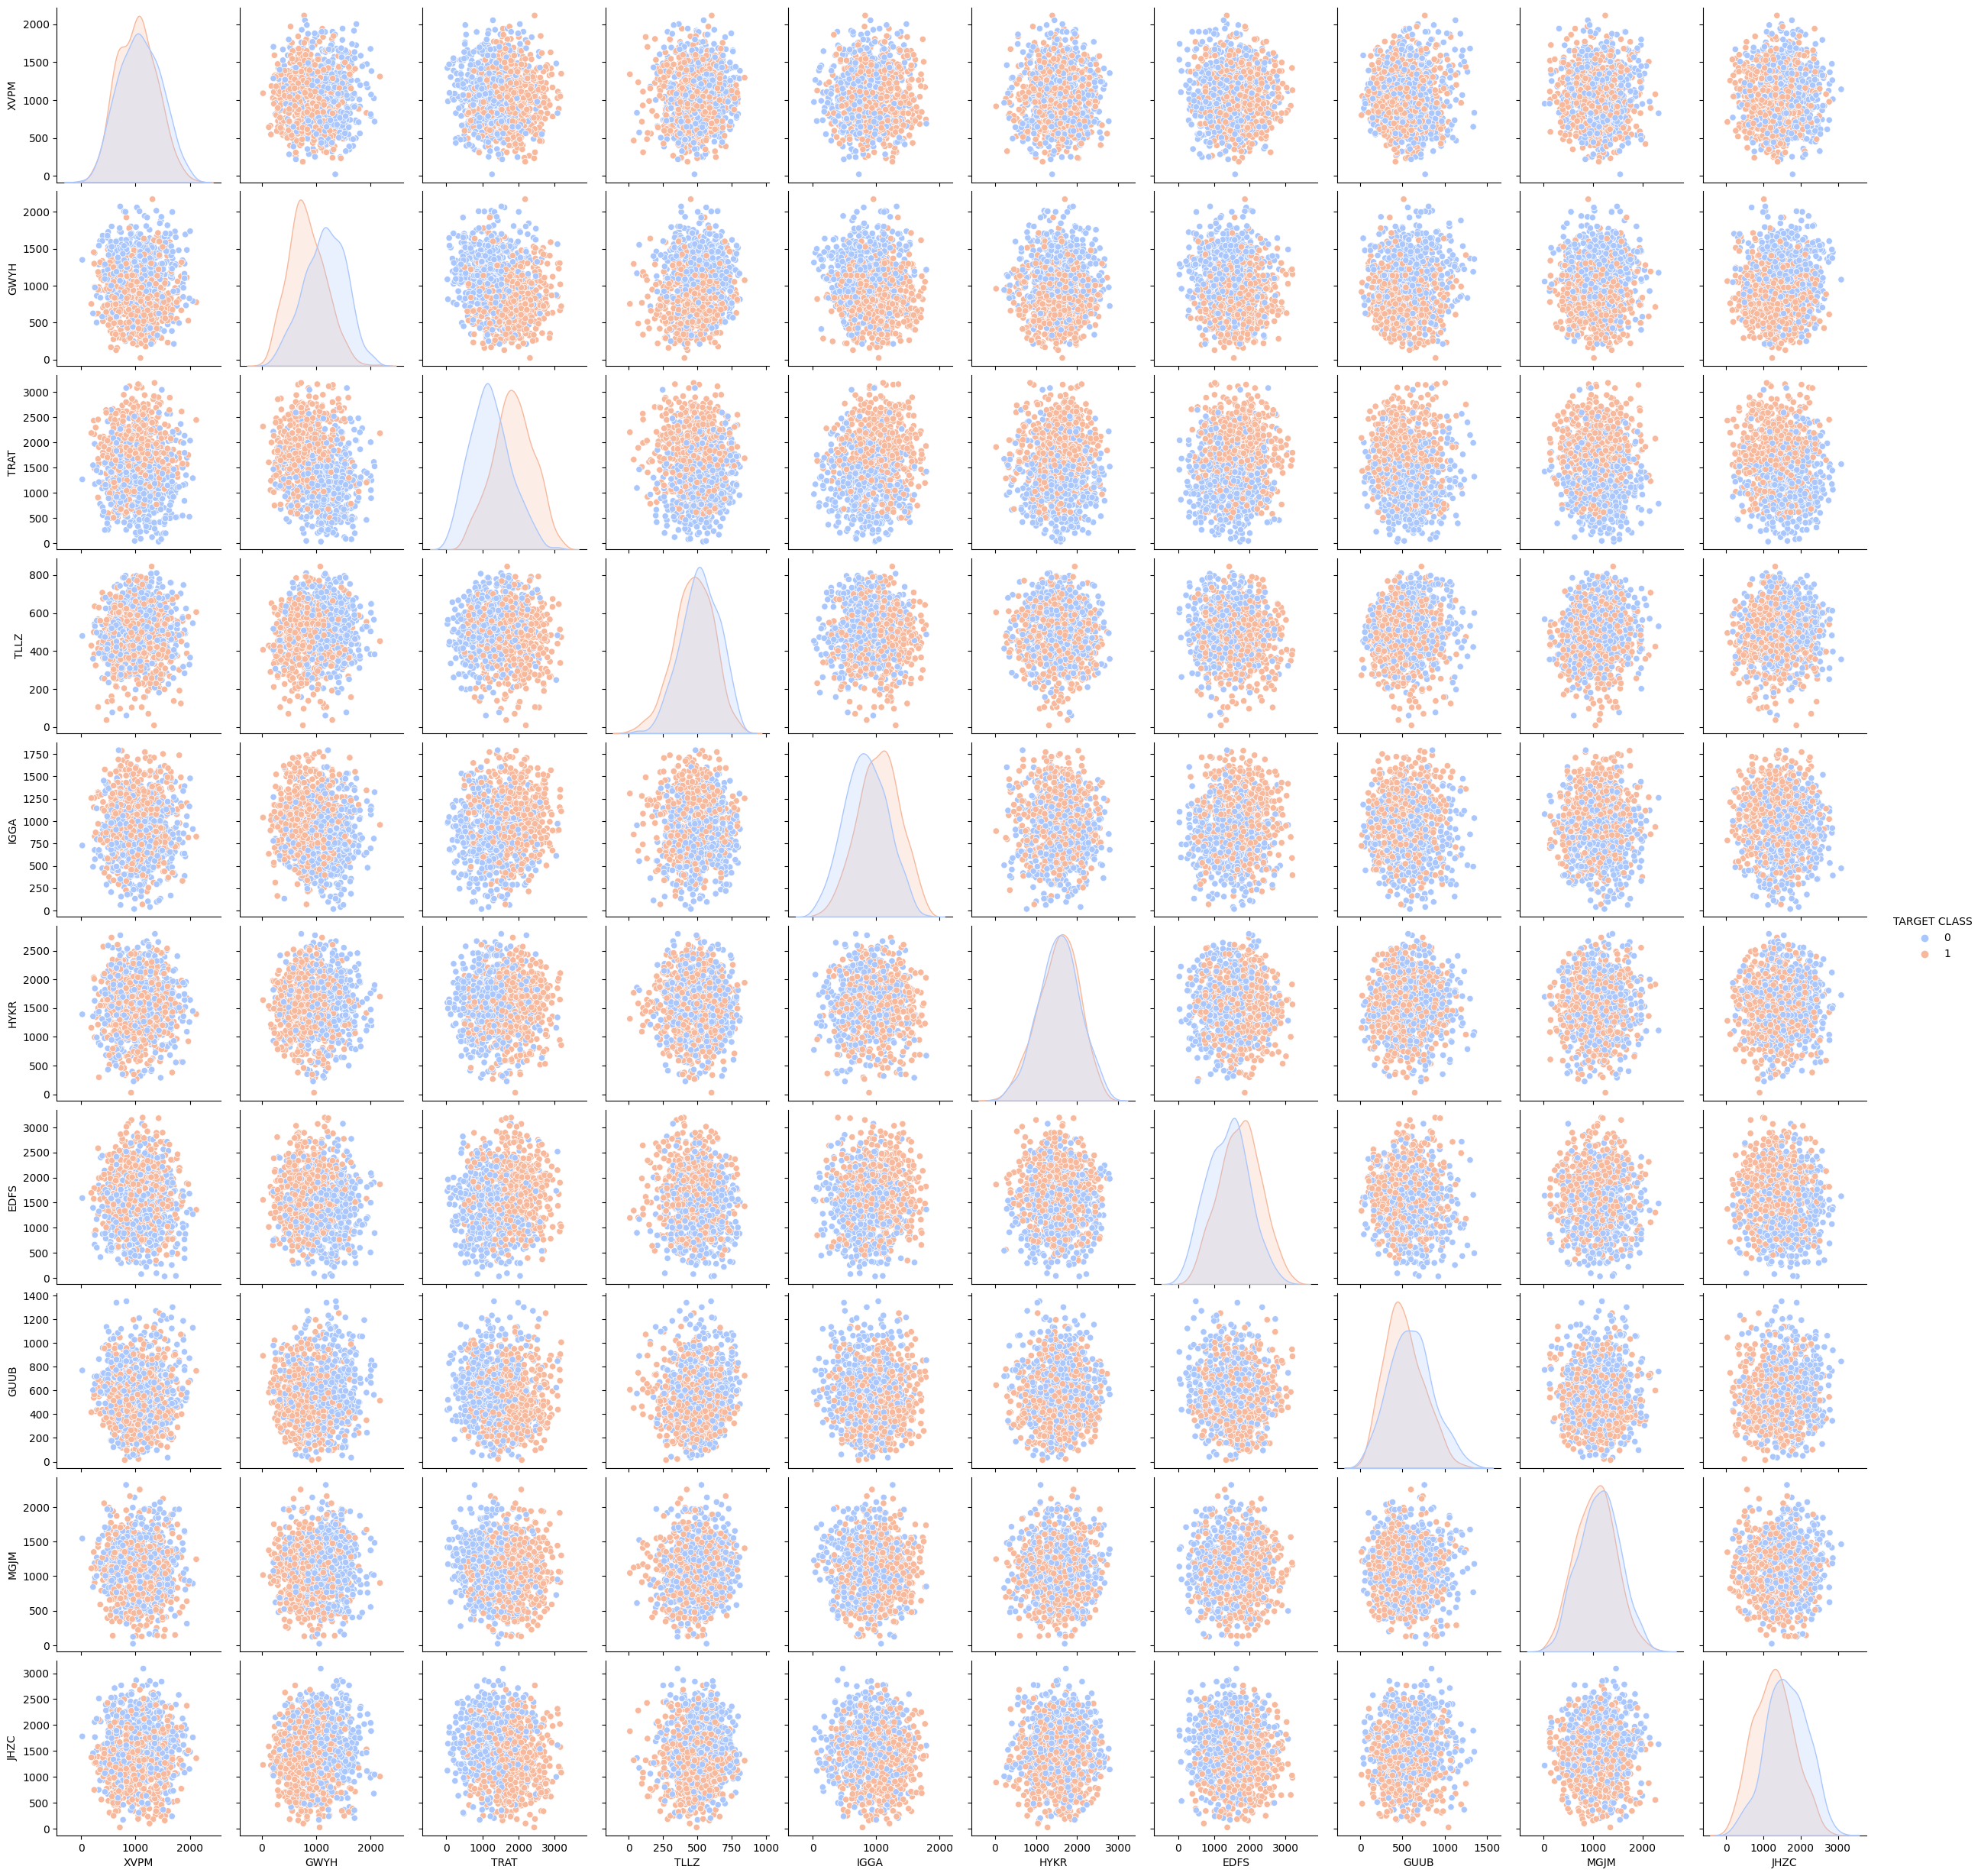

In [62]:
sns.pairplot(data=df, hue='TARGET CLASS',palette='coolwarm')

# Standardize the Variables


Importing StandardScaler from Scikit learn.

In [63]:
from sklearn.preprocessing import StandardScaler

Creating a StandardScaler() object called scaler.

In [64]:
scaler = StandardScaler()

Fitting scaler to the features.

In [ ]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

Using the .transform() method to transform the features to a scaled version.

In [66]:
scaled_v = scaler.transform(df.drop('TARGET CLASS', axis=1))

Converting the scaled features to a dataframe and checking the head of this dataframe to make sure the scaling worked.

In [67]:
scaled_df = pd.DataFrame(scaled_v, columns=df.columns[:-1])
scaled_df

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0    1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1   -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2    0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3    0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4   -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.776682  0.758234 -1.753322  0.507699  0.174588 -1.279354 -1.797957   
996 -0.313446  0.385206  0.885502 -0.083136 -1.208486  0.309242  0.746346   
997 -0.358895 -0.979015  0.837715  0.014018 -1.397424  0.054473  0.164120   
998  0.275080 -0.992399  0.030371  1.062954  1.142871 -0.192872  2.051386   
999  0.625896  0.795109  1.121800  1.185944  0.555582 -1.133032  0.746559   

         GUUB      MGJM      JHZC  
0   -0.932794  1.008313 -1.069627  
1   -0.461864  0.258321 -1.041546  
2    1.149298  2.184784  0.342811  
3   -0.888557  0.162310 -0.002793  
4    0.391419 -1.365603  0.787762  
..        ...       ...       ...  
995  0.431419  0.088717  1.188886  
996 -0.112571 -1.763636 -1.559081  
997 -1.514726 -0.275122  0.864287  
998 -0.036233  0.436685 -0.212456  
999 -1.251565 -0.603529 -0.879859  

[1000 rows x 10 columns]

#Training Test Split

Using train_test_split to split the data into a training set and a testing set.

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_df, df['TARGET CLASS'],test_size=0.30)

# Using KNN

Importing KNeighborsClassifier from scikit learn.

In [69]:
from sklearn.neighbors import KNeighborsClassifier

Creating a KNN model instance with n_neighbors=1

In [70]:
knn_model = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [71]:
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate KNN model

Using the predict method to predict values using KNN model and X_test.

In [72]:
predicted = knn_model.predict(X_test)

Creating a confusion matrix and classification report.

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       150
           1       0.75      0.75      0.75       150

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300

[[113  37]
 [ 37 113]]


# Choosing a K Value
Useage of elbow method to pick a good K Value.

Creating a for loop that trains various KNN models with different k values, then keeping track of the error_rate for each of these models with a list.

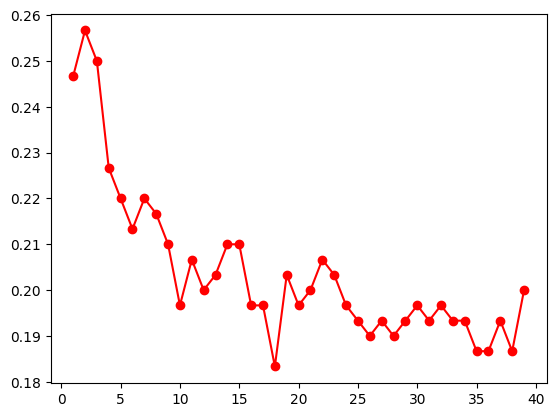

In [74]:
error_rate=[]

for i in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    predicted_i = knn_model.predict(X_test)
    error_rate.append(np.mean(predicted_i != y_test))
plt.plot(range(1,40),error_rate, 'ro-', )


Creating the following plot using the information from your for loop.

## Retraining with new K Value

Retraining model with the best K value and re-doing the classification report and the confusion matrix.

In [75]:
knn_model = KNeighborsClassifier(n_neighbors=30)
knn_model.fit(X_train, y_train)
predicted = knn_model.predict(X_test)

print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       150
           1       0.83      0.77      0.80       150

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

[[126  24]
 [ 35 115]]
